# Mental Health and Social Media Analysis

## Introduction

A Mental health issue according to the World Health Organization, WHO, is characterized by disturbance in an individual’s cognition, emotional regulation, or behaviour. Some of those issues are anxiety, depression, ADHD, bipolar disorder, etc. 
One out of eight people in the world has a mental disorder,  where anxiety and depression are the most common. 
The social media is one of the causes of the deterioration of mental health. Social media means applications that allow users to interact with each other, by exchanging media, text, etc, like for example Instagram, TikTok, Facebook, etc. 
The social media acts activating a part of the brain of rewards, releasing dopamine, a neuromodulatory molecule that gives feelings of pleasure, satisfaction and motivation; and those feelings cause addiction and are usually associate with anxiety and other mental health conditions. 


## Objective

The purpose of this project is to analyse the social media impacts on the mental health of people. It was based on 20 features, consisting on personal questions that are related to anxiety, depression, ADHD and self esteem. 

## Data Analysis

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Reading the dataset
df = pd.read_csv('smmh.csv')
df.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


The question 9 to 20 are ranked in a scale from 0 to 5, which 0 means low and 5 high frequently 

### Renaming the features 

To make the data more clean and easier to visualize, the features will be renamed

In [3]:
# Analysing the original features 
df.columns

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

In [4]:
# Modifing the features
df.rename(columns = {"1. What is your age?":"Age",
                     "2. Gender":"Gender",
                     "3. Relationship Status":"Relationship Status",
                     "4. Occupation Status":"Occupation",
                     "5. What type of organizations are you affiliated with?":"Affiliations",
                     "6. Do you use social media?":"Use Social Media",
                     "7. What social media platforms do you commonly use?":"Platforms Used",
                     "8. What is the average time you spend on social media every day?":"Time Spent",
                     "9. How often do you find yourself using Social media without a specific purpose?":"ADHD (1)",
                     "10. How often do you get distracted by Social media when you are busy doing something?":"ADHD (2)",
                     "11. Do you feel restless if you haven't used Social media in a while?":"Anxiety (1)",
                     "12. On a scale of 1 to 5, how easily distracted are you?":"ADHD (3)",
                     "13. On a scale of 1 to 5, how much are you bothered by worries?":"Anxiety (2)",
                     "14. Do you find it difficult to concentrate on things?":"ADHD (4)",
                     "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?":"Self Esteem (1)",
                     "16. Following the previous question, how do you feel about these comparisons, generally speaking?":"Self Esteem (2)",
                     "17. How often do you look to seek validation from features of social media?":"Self Esteem (3)",
                     "18. How often do you feel depressed or down?":"Depression (1)",
                     "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?":"Depression (2)",
                     "20. On a scale of 1 to 5, how often do you face issues regarding sleep?":"Depression (3)"},inplace=True)
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Relationship Status', 'Occupation',
       'Affiliations', 'Use Social Media', 'Platforms Used', 'Time Spent',
       'ADHD (1)', 'ADHD (2)', 'Anxiety (1)', 'ADHD (3)', 'Anxiety (2)',
       'ADHD (4)', 'Self Esteem (1)', 'Self Esteem (2)', 'Self Esteem (3)',
       'Depression (1)', 'Depression (2)', 'Depression (3)'],
      dtype='object')

We can observe that are 4 questions related to ADHD, 2 of Anxiety, 3 of Self Esteem, and 3 of Depression. 

### Analysis 

In [5]:
df.head()

,Timestamp,Age,Gender,Relationship Status,Occupation,Affiliations,Use Social Media,Platforms Used,Time Spent,ADHD (1),...,Anxiety (1),ADHD (3),Anxiety (2),ADHD (4),Self Esteem (1),Self Esteem (2),Self Esteem (3),Depression (1),Depression (2),Depression (3)
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [6]:
# Analysing the shape of the dataset
df.shape

(481, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            481 non-null    object 
 1   Age                  481 non-null    float64
 2   Gender               481 non-null    object 
 3   Relationship Status  481 non-null    object 
 4   Occupation           481 non-null    object 
 5   Affiliations         451 non-null    object 
 6   Use Social Media     481 non-null    object 
 7   Platforms Used       481 non-null    object 
 8   Time Spent           481 non-null    object 
 9   ADHD (1)             481 non-null    int64  
 10  ADHD (2)             481 non-null    int64  
 11  Anxiety (1)          481 non-null    int64  
 12  ADHD (3)             481 non-null    int64  
 13  Anxiety (2)          481 non-null    int64  
 14  ADHD (4)             481 non-null    int64  
 15  Self Esteem (1)      481 non-null    int

In [8]:
# Analysing the type of each feature
df.dtypes

Timestamp               object
Age                    float64
Gender                  object
Relationship Status     object
Occupation              object
Affiliations            object
Use Social Media        object
Platforms Used          object
Time Spent              object
ADHD (1)                 int64
ADHD (2)                 int64
Anxiety (1)              int64
ADHD (3)                 int64
Anxiety (2)              int64
ADHD (4)                 int64
Self Esteem (1)          int64
Self Esteem (2)          int64
Self Esteem (3)          int64
Depression (1)           int64
Depression (2)           int64
Depression (3)           int64
dtype: object

#### Missing values analysis

In [9]:
# Analysing the missing values
df.isnull().sum()

Timestamp               0
Age                     0
Gender                  0
Relationship Status     0
Occupation              0
Affiliations           30
Use Social Media        0
Platforms Used          0
Time Spent              0
ADHD (1)                0
ADHD (2)                0
Anxiety (1)             0
ADHD (3)                0
Anxiety (2)             0
ADHD (4)                0
Self Esteem (1)         0
Self Esteem (2)         0
Self Esteem (3)         0
Depression (1)          0
Depression (2)          0
Depression (3)          0
dtype: int64

In [10]:
# Analysing the amount of missing values for affiliation
null_values = df["Affiliations"].isna().sum()
null_values

30

In [11]:
# Analysing the total amount for affiliation
total = df["Affiliations"].count()
total

451

In [12]:
# Analysing the percentage of missing values for affiliation
percentage_null_values = null_values/total *100
percentage_null_values

6.651884700665188

According to the references of the dataset, the affilitian has some null values because they could leave it in blank indicating they are not affiliated with anyone. And also the amount of null values of affiliation were aproximate 6% of the data, and won't interfere for the analysis it will be done; so on this case the missing values will not be treated.

#### Correlation

In [13]:
# Correlation of the features
df.corr(numeric_only=True).style.background_gradient(cmap="Oranges")

,Age,ADHD (1),ADHD (2),Anxiety (1),ADHD (3),Anxiety (2),ADHD (4),Self Esteem (1),Self Esteem (2),Self Esteem (3),Depression (1),Depression (2),Depression (3)
Age,1.000000,-0.225131,-0.232202,-0.125806,-0.224487,-0.288539,-0.264555,-0.092315,0.017910,-0.038936,-0.303582,-0.241239,-0.161129
ADHD (1),-0.225131,1.000000,0.463353,0.359031,0.365491,0.252082,0.288829,0.148203,0.087645,0.144519,0.315478,0.359379,0.260496
ADHD (2),-0.232202,0.463353,1.000000,0.513354,0.607419,0.343307,0.527745,0.288504,0.078065,0.270144,0.379444,0.389132,0.255362
Anxiety (1),-0.125806,0.359031,0.513354,1.000000,0.514801,0.347036,0.469440,0.320973,0.134191,0.245925,0.328969,0.384770,0.166601
ADHD (3),-0.224487,0.365491,0.607419,0.514801,1.000000,0.462673,0.662768,0.286120,0.014630,0.172585,0.407667,0.479993,0.291147
Anxiety (2),-0.288539,0.252082,0.343307,0.347036,0.462673,1.000000,0.545904,0.414301,0.020589,0.208847,0.588757,0.430348,0.327367
ADHD (4),-0.264555,0.288829,0.527745,0.469440,0.662768,0.545904,1.000000,0.371156,0.060742,0.242035,0.509794,0.503196,0.354676
Self Esteem (1),-0.092315,0.148203,0.288504,0.320973,0.286120,0.414301,0.371156,1.000000,-0.011468,0.417328,0.417801,0.374242,0.193716
Self Esteem (2),0.017910,0.087645,0.078065,0.134191,0.014630,0.020589,0.060742,-0.011468,1.000000,0.153574,0.035470,0.046153,0.068510
Self Esteem (3),-0.038936,0.144519,0.270144,0.245925,0.172585,0.208847,0.242035,0.417328,0.153574,1.000000,0.272125,0.278575,0.128898


#### Analysing the Gender

The categories Nonbinary, Non-binary, Non binary, NB, unsure, Trans, There are others, will all be categorized as others, which means not female or male. 

In [14]:
# Analysing all types of gender
df["Gender"].value_counts(ascending=False)

Gender
Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: count, dtype: int64

In [15]:
# Modifing the categories for gender
df["Gender"].replace("Non-binary", "Others", inplace=True)
df["Gender"].replace("Nonbinary ", "Others", inplace=True)
df["Gender"].replace("NB", "Others", inplace=True)
df["Gender"].replace("unsure ", "Others", inplace=True)
df["Gender"].replace("Trans","Others", inplace=True)
df["Gender"].replace("Non binary ", "Others", inplace=True)
df["Gender"].replace("There are others???", inplace=True)

In [16]:
df["Gender"].unique()

array(['Male', 'Female', 'Others'], dtype=object)

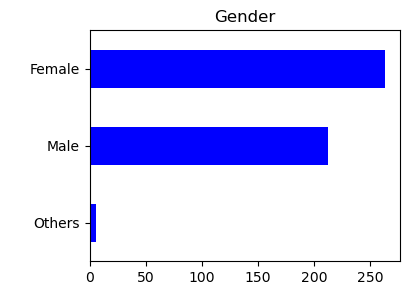

In [17]:
# Plotting the gender after modification
plt.figure(figsize = (4,3))
df["Gender"].value_counts(ascending= True).plot.barh(title="Gender", color='blue')
plt.ylabel(' ');

The amount females were relatively bigger than the males, and the category others were quite smaller.

#### Analysing the Social Media Users

In [18]:
df["Use Social Media"].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
# People that uses social media
social_media_users = df[df["Use Social Media"] == "Yes"]

In [20]:
social_media_users["Use Social Media"].count()

478

In [21]:
# People that doesn't use social media
non_social_media_users = df[df["Use Social Media"] == "No"]

In [22]:
non_social_media_users["Use Social Media"].count()

3

In [23]:
non_social_media_users

,Timestamp,Age,Gender,Relationship Status,Occupation,Affiliations,Use Social Media,Platforms Used,Time Spent,ADHD (1),...,Anxiety (1),ADHD (3),Anxiety (2),ADHD (4),Self Esteem (1),Self Esteem (2),Self Esteem (3),Depression (1),Depression (2),Depression (3)
9,4/18/2022 19:41:34,20.0,Male,Single,University Student,University,No,"Reddit, Pinterest",Less than an Hour,1,...,1,1,1,1,1,1,1,1,1,1
54,4/18/2022 22:35:53,26.0,Male,In a relationship,Salaried Worker,Company,No,"YouTube, Discord, Reddit",Between 1 and 2 hours,4,...,1,2,2,1,1,3,1,1,3,2
134,4/19/2022 22:04:03,50.0,Male,Divorced,Salaried Worker,Private,No,"Instagram, YouTube",Between 1 and 2 hours,2,...,1,2,2,2,1,4,1,2,2,1


It is possible to observer that the amount of people that use social media is the majority, and only 3 people don't use it.
This value is basically not significant, and since the goal is to analyse if social media impacts or not in mental health, the people that doesn't use social media will be disconsidered. Another observation is that this three people that don't use social media are all from the gender male.

#### Analysing the Relationship status

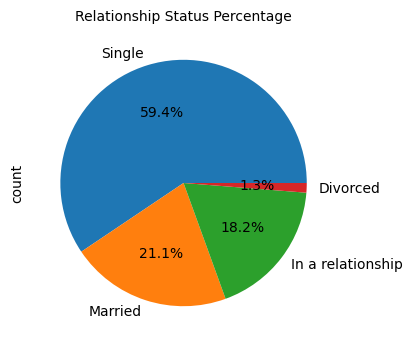

In [24]:
# Analysing the Relationship status
plt.figure(figsize = (6,4))
social_media_users['Relationship Status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Relationship Status Percentage", fontsize = 10)
plt.show();

The majority of people that uses social media are single, representing 59.4%, followed by married people with 21.1%. 
According to the ScienceDirect paper "Social media use, social anxiety, and loneliness: A systematic review", lonely people tend to use social media as a way for social support and to compensate their lack of in-person relationships, that can be a reason for why the majority of people that use social media have single relationship status.

#### Anxiety

In [25]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Relationship Status', 'Occupation',
       'Affiliations', 'Use Social Media', 'Platforms Used', 'Time Spent',
       'ADHD (1)', 'ADHD (2)', 'Anxiety (1)', 'ADHD (3)', 'Anxiety (2)',
       'ADHD (4)', 'Self Esteem (1)', 'Self Esteem (2)', 'Self Esteem (3)',
       'Depression (1)', 'Depression (2)', 'Depression (3)'],
      dtype='object')

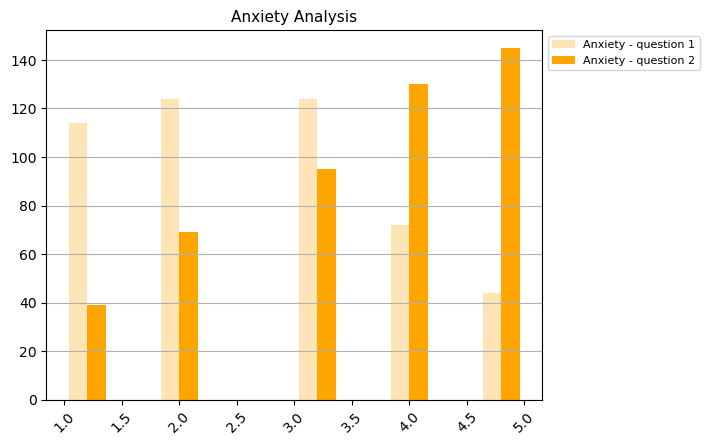

In [26]:
# Histogram Anxiety analysis
plt.hist(social_media_users[["Anxiety (1)", "Anxiety (2)"]], color= ["moccasin", "orange"])
plt.legend(["Anxiety - question 1", "Anxiety - question 2"], bbox_to_anchor=(1.0, 1.0), loc="upper left", fontsize=8)
plt.title("Anxiety Analysis", fontsize=11)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

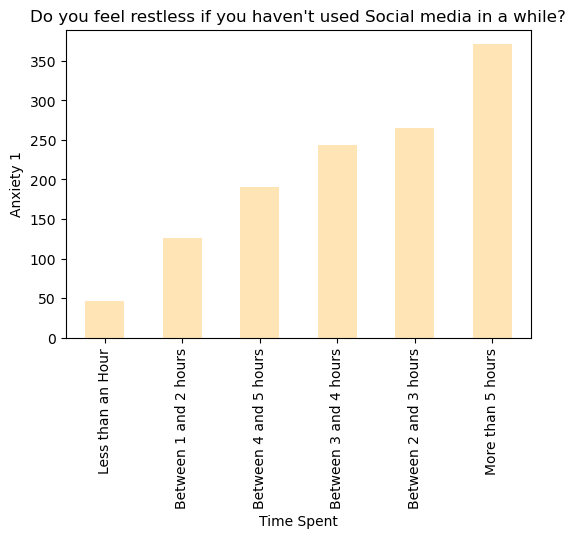

In [27]:
# PLotting time spent in social media for Anxiety 1
plt.figure(figsize = (6,4))
social_media_users.groupby("Time Spent")["Anxiety (1)"].sum().sort_values(ascending= True).plot.bar(title="Do you feel restless if you haven't used Social media in a while?", color="moccasin")
plt.xlabel("Time Spent")
plt.ylabel("Anxiety 1");

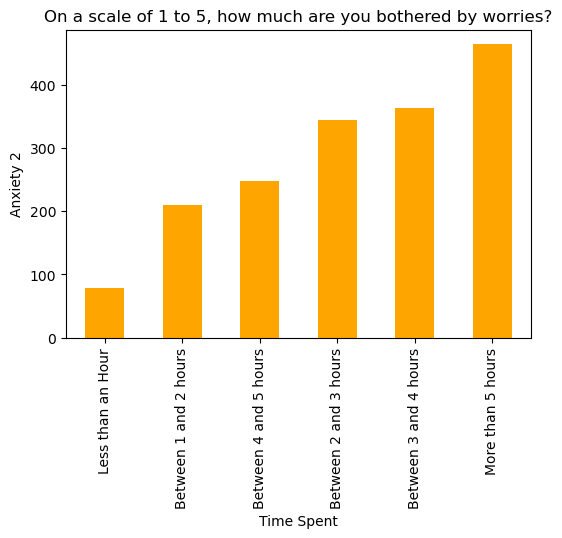

In [28]:
# PLotting time spent in social media for Anxiety 2
plt.figure(figsize = (6,4))
social_media_users.groupby("Time Spent")["Anxiety (2)"].sum().sort_values(ascending= True).plot.bar(title="On a scale of 1 to 5, how much are you bothered by worries?", color="orange")
plt.xlabel("Time Spent")
plt.ylabel("Anxiety 2");

#### ADHD - Attention Deficit Hyperactivity Disorder

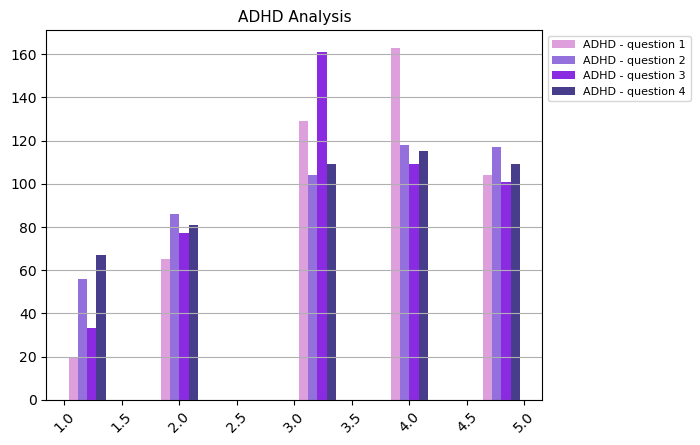

In [29]:
# Histogram ADHD analysis
plt.hist(df[["ADHD (1)", "ADHD (2)", "ADHD (3)", "ADHD (4)"]], color= ["plum", "mediumpurple", "blueviolet", "darkslateblue"])
plt.legend(["ADHD - question 1", "ADHD - question 2", "ADHD - question 3", "ADHD - question 4"], bbox_to_anchor=(1.0, 1.0), loc="upper left", fontsize=8)
plt.title("ADHD Analysis", fontsize=11)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

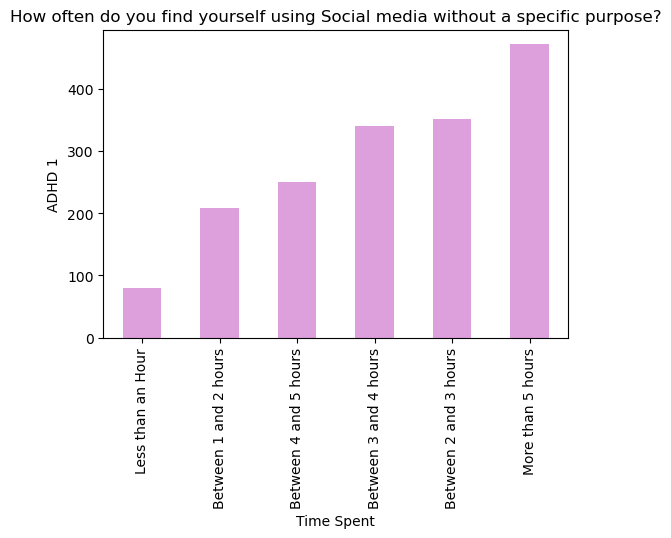

In [30]:
# PLotting time spent in social media for ADHD 1
plt.figure(figsize = (6,4))
social_media_users.groupby("Time Spent")["ADHD (1)"].sum().sort_values(ascending= True).plot.bar(title="How often do you find yourself using Social media without a specific purpose?", color="plum")
plt.xlabel("Time Spent")
plt.ylabel("ADHD 1");

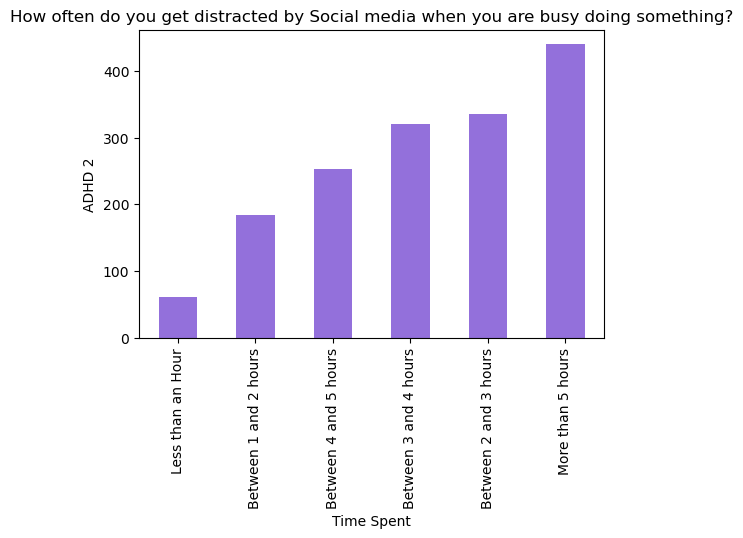

In [31]:
# PLotting time spent in social media for ADHD 2
plt.figure(figsize = (6,4))
social_media_users.groupby("Time Spent")["ADHD (2)"].sum().sort_values(ascending= True).plot.bar(title="How often do you get distracted by Social media when you are busy doing something?", color="mediumpurple")
plt.xlabel("Time Spent")
plt.ylabel("ADHD 2");

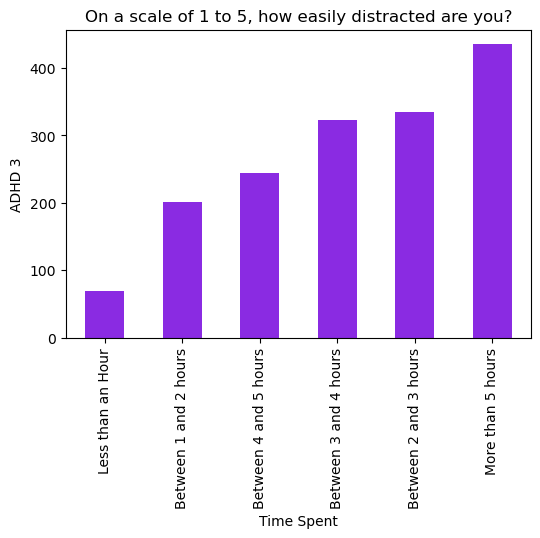

In [32]:
# PLotting time spent in social media for ADHD 3
plt.figure(figsize = (6,4))
social_media_users.groupby("Time Spent")["ADHD (3)"].sum().sort_values(ascending= True).plot.bar(title="On a scale of 1 to 5, how easily distracted are you?", color="blueviolet")
plt.xlabel("Time Spent")
plt.ylabel("ADHD 3");

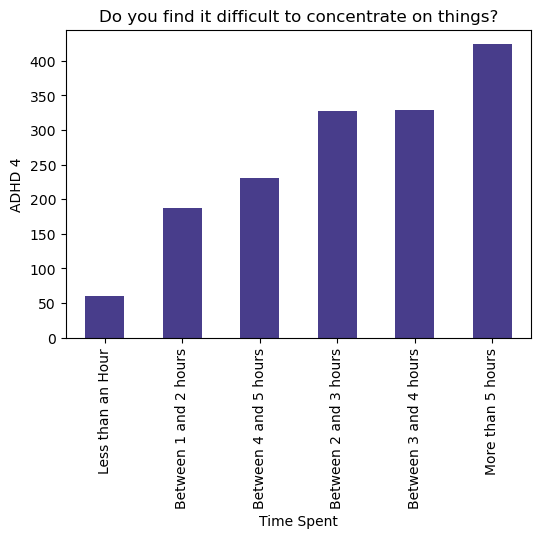

In [33]:
# PLotting time spent in social media for ADHD 4
plt.figure(figsize = (6,4))
social_media_users.groupby("Time Spent")["ADHD (4)"].sum().sort_values(ascending= True).plot.bar(title="Do you find it difficult to concentrate on things?", color="darkslateblue")
plt.xlabel("Time Spent")
plt.ylabel("ADHD 4");

#### Self Steem

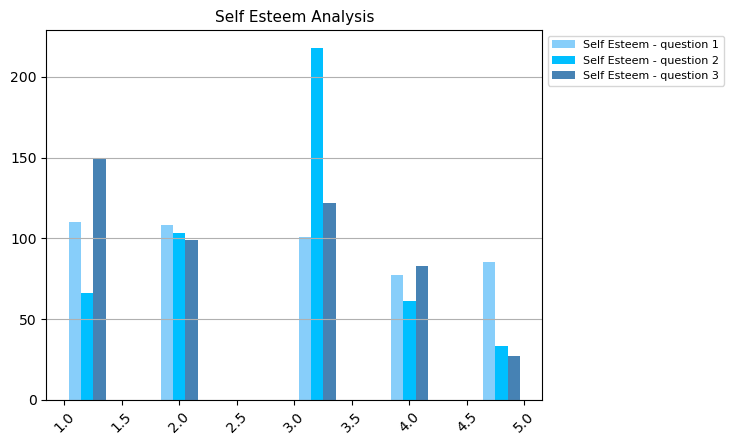

In [34]:
# Histogram Self Steem analysis
plt.hist(df[["Self Esteem (1)", "Self Esteem (2)", "Self Esteem (3)"]], color= ["lightskyblue", "deepskyblue", "steelblue"])
plt.legend(["Self Esteem - question 1", "Self Esteem - question 2", "Self Esteem - question 3"], bbox_to_anchor=(1.0, 1.0), loc="upper left", fontsize=8)
plt.title("Self Esteem Analysis", fontsize=11)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

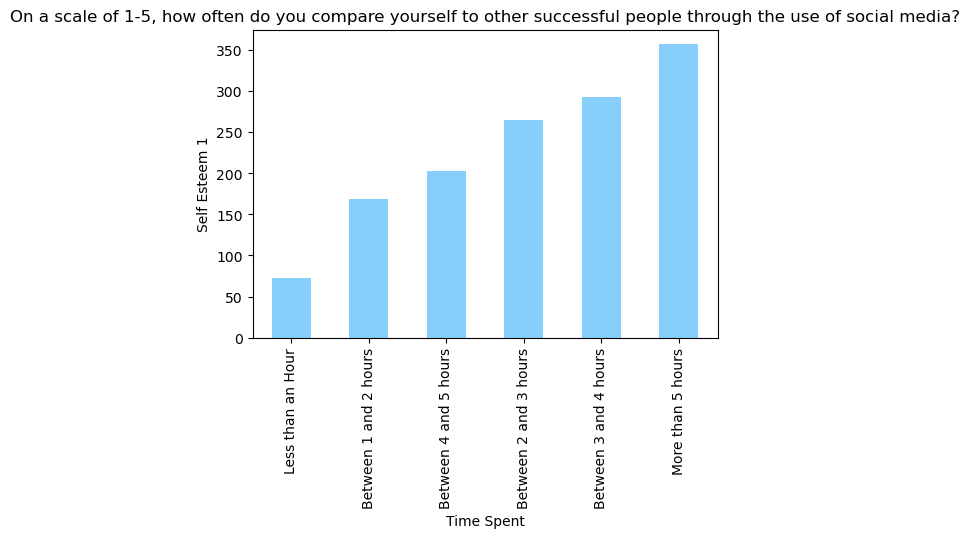

In [35]:
# PLotting time spent in social media for Self Steem 1
plt.figure(figsize = (6,4))
social_media_users.groupby("Time Spent")["Self Esteem (1)"].sum().sort_values(ascending= True).plot.bar(title="On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?", color="lightskyblue")
plt.xlabel("Time Spent")
plt.ylabel("Self Esteem 1");

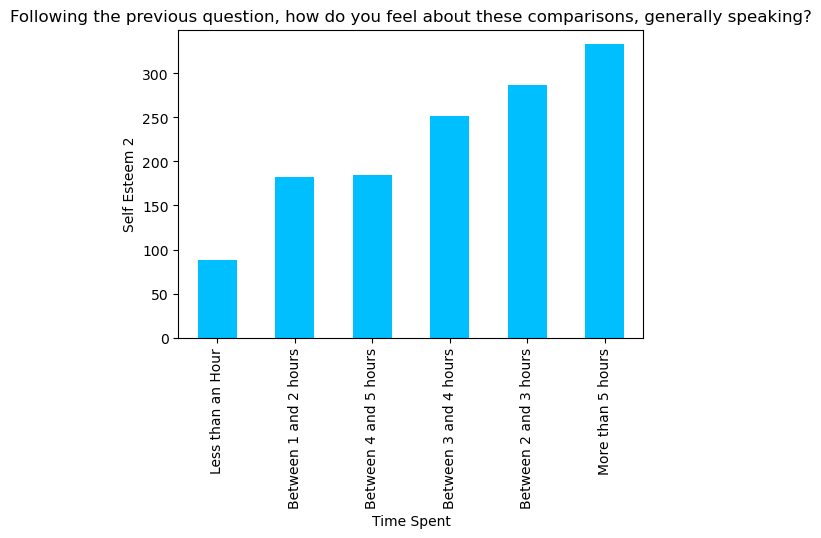

In [36]:
# PLotting time spent in social media for Self Steem 2
plt.figure(figsize = (6,4))
social_media_users.groupby("Time Spent")["Self Esteem (2)"].sum().sort_values(ascending= True).plot.bar(title="Following the previous question, how do you feel about these comparisons, generally speaking?", color="deepskyblue")
plt.xlabel("Time Spent")
plt.ylabel("Self Esteem 2");

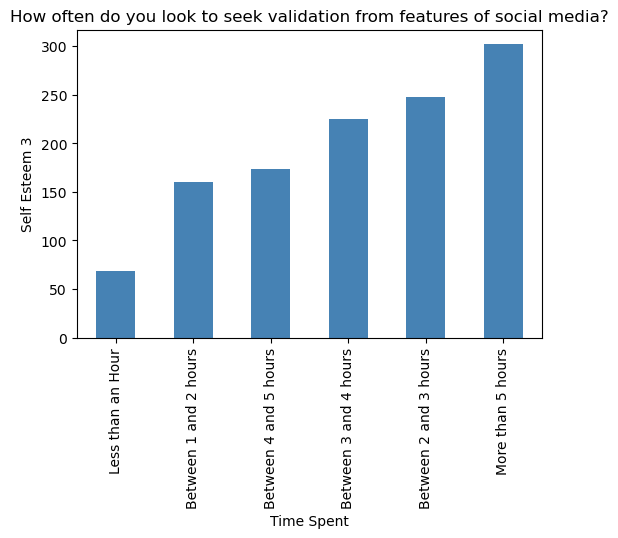

In [37]:
# PLotting time spent in social media for Self Steem 3
plt.figure(figsize = (6,4))
social_media_users.groupby("Time Spent")["Self Esteem (3)"].sum().sort_values(ascending= True).plot.bar(title="How often do you look to seek validation from features of social media?", color="steelblue")
plt.xlabel("Time Spent")
plt.ylabel("Self Esteem 3");

#### Depression

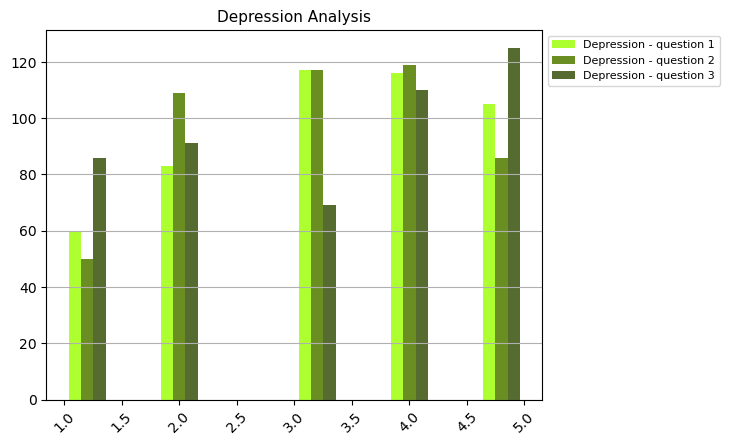

In [38]:
# Histogram Depression analysis
plt.hist(df[["Depression (1)", "Depression (2)", "Depression (3)"]], color= ["greenyellow", "olivedrab", "darkolivegreen"])
plt.legend(["Depression - question 1", "Depression - question 2", "Depression - question 3"], bbox_to_anchor=(1.0, 1.0), loc="upper left", fontsize=8)
plt.title("Depression Analysis", fontsize=11)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

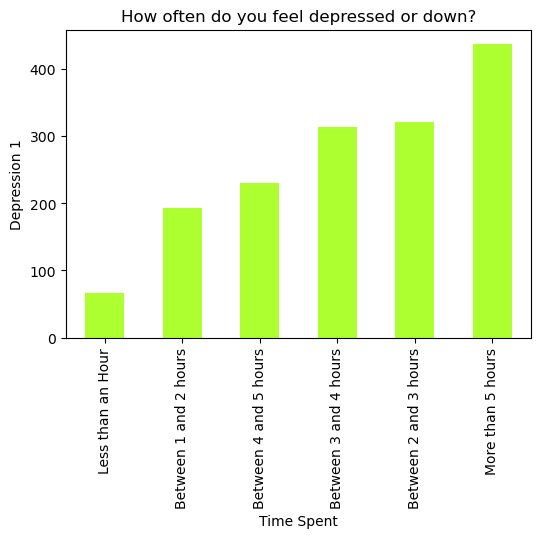

In [39]:
# PLotting time spent in social media for Depression 1
plt.figure(figsize = (6,4))
social_media_users.groupby("Time Spent")["Depression (1)"].sum().sort_values(ascending= True).plot.bar(title="How often do you feel depressed or down?", color="greenyellow")
plt.xlabel("Time Spent")
plt.ylabel("Depression 1");

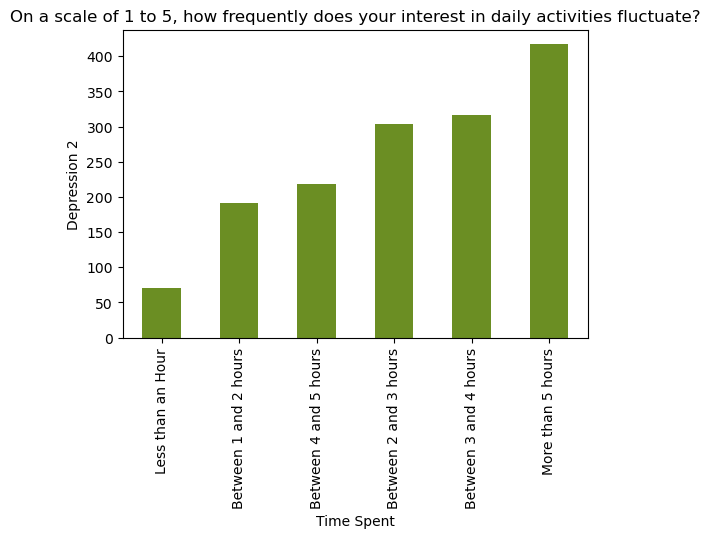

In [40]:
# PLotting time spent in social media for Depression 2
plt.figure(figsize = (6,4))
social_media_users.groupby("Time Spent")["Depression (2)"].sum().sort_values(ascending= True).plot.bar(title="On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?", color="olivedrab")
plt.xlabel("Time Spent")
plt.ylabel("Depression 2");

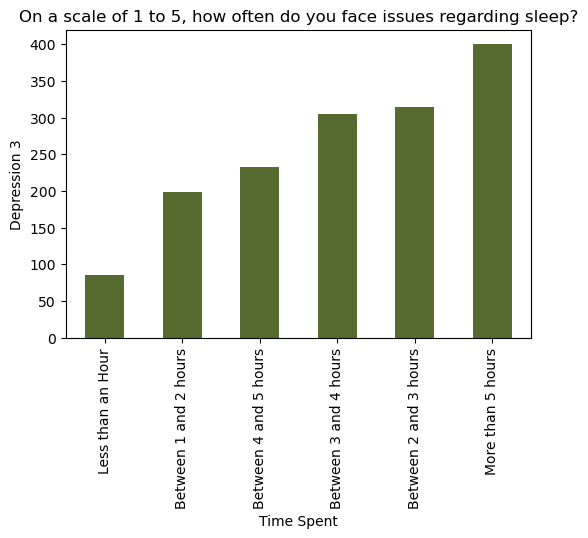

In [41]:
# PLotting time spent in social media for Depression 3
plt.figure(figsize = (6,4))
social_media_users.groupby("Time Spent")["Depression (3)"].sum().sort_values(ascending= True).plot.bar(title="On a scale of 1 to 5, how often do you face issues regarding sleep?", color="darkolivegreen")
plt.xlabel("Time Spent")
plt.ylabel("Depression 3");

## Conclusion

In conclusion, all the analysis made for anxiety, ADHD, self steem and depression, show that more the time spent on social media, more affected the mental health will be. 
For all the questions made to the users of social media, show that those people that spend more than 5 hours on it, are also those that has more signs of developing mental health, since these studies has a scale from 0 to 5 (low to high frequently). 
It is important to have a balanced life, and use social media wisely to avoid developing mental health issues. 

## References

**Kaggle:** https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health/data

**World Health Organization (WHO):** https://www.who.int/news-room/fact-sheets/detail/mental-disorders

**McLean Hospital:** https://www.mcleanhospital.org/essential/it-or-not-social-medias-affecting-your-mental-health

**National Library of Medicine:** https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9915628/

**ScienceDirect:** https://www.sciencedirect.com/science/article/pii/S245195882100018X 